<a href="https://colab.research.google.com/github/NaufalYogaPratama/data-analysis-submission/blob/main/BikeSharingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Naufal Yoga Pratama
- **Email:** naufalpratama2113@gmail.com
- **ID Dicoding:** Naufal Yoga Pratama

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan hari kerja (workingday)?
- Apakah kondisi cuaca (weathersit) memiliki dampak signifikan terhadap jumlah penyewaan sepeda (casual dan registered)?
- Bagaimana tren jumlah penyewaan sepeda selama dua tahun terakhir (2011-2012)?
- Apakah ada jam tertentu yang menunjukkan lonjakan penyewaan sepeda (data hourly)?

## Import Semua Packages/Library yang Digunakan

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [27]:
# Memperoleh data dari day_csv
day_df = pd.read_csv("https://raw.githubusercontent.com/NaufalYogaPratama/data-analysis-submission/812a728ea76f5ada54e7164e561d807d315b7238/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=day_df)

https://docs.google.com/spreadsheets/d/1dqkfik5SWxfNUcFVP-bIKQowSgwjiK1dlxB5iGTNcc4#gid=0


In [29]:
# Memperoleh data dari hour_csv
hour_df = pd.read_csv("https://raw.githubusercontent.com/NaufalYogaPratama/data-analysis-submission/812a728ea76f5ada54e7164e561d807d315b7238/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=hour_df)

https://docs.google.com/spreadsheets/d/1-rrlpoV9dl7Wj5MLwuPV3d8Al06VCX1Uet3Ud_wgX5Q#gid=0


**Insight:**
- (`day_df`) Dataset harian mencatat penggunaan sepeda berdasarkan musim, cuaca, dan hari kerja.
- (`day_df`) Kolom yang relevan untuk analisis: season, workingday, weathersit, cnt.
- (`hour_df`) Dataset per jam memberikan detail yang lebih granular tentang waktu puncak penggunaan sepeda.
- (`hour_df`) Kolom yang penting: hr, weathersit, temp, casual, registered, cnt.

### Assessing Data

#### Menilai tabel `day_df`

In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [32]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Kolom `dteday` yang seharusnya berisi tanggal malah terbaca sebagai tipe data `object`
- Nilai minimum `humidity` (kelembapan) adalah 0, yang mungkin mengindikasikan adanya data yang tidak valid.

#### Menilai tabel `hour_df`

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Kolom `dteday` yang seharusnya berisi tanggal malah terbaca sebagai tipe data `object`
- Nilai minimum `humidity` (kelembapan) dan `windspeed` adalah 0, yang mungkin mengindikasikan adanya data yang tidak valid.

**Insight:**
- (`day_df`) Kolom `dteday` yang seharusnya berisi tanggal malah terbaca sebagai tipe data object
- (`day_df`) Nilai minimum `humidity` (kelembapan) adalah 0, yang mungkin mengindikasikan adanya data yang tidak valid.
- (`hour_df`) Kolom `dteday` yang seharusnya berisi tanggal malah terbaca sebagai tipe data object
- (`hour_df`) Nilai minimum `humidity` (kelembapan) dan `windspeed` adalah 0, yang mungkin mengindikasikan adanya data yang tidak valid.

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [35]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Inaccurate Value

In [37]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [38]:
day_df[day_df['hum'] == 0][['dteday', 'hum', 'cnt']]

,dteday,hum,cnt
68,2011-03-10,0.0,623


In [39]:
# Hapus baris yang memiliki nilai 0 pada kolom hum
day_df = day_df[day_df['hum'] != 0]

Menghapus baris tersebut karena hanya ada satu data yang memiliki nilai 0 pada kolom hum, dan data tersebut tidak terlalu penting.

In [40]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


#### Memperbaiki tabel `hour_df`

##### Memperbaiki tipe data

In [41]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [42]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Inaccurate Value

In [43]:
hour_df.min()

,0
instant,1
dteday,2011-01-01 00:00:00
season,1
yr,0
mnth,1
hr,0
holiday,0
weekday,0
workingday,0
weathersit,1


In [44]:
hour_df[hour_df['hum'] == 0][['dteday', 'hum', 'windspeed','cnt']]

,dteday,hum,windspeed,cnt
1551,2011-03-10,0.0,0.2537,3
1552,2011-03-10,0.0,0.2537,2
1553,2011-03-10,0.0,0.2537,1
1554,2011-03-10,0.0,0.1940,3
1555,2011-03-10,0.0,0.3284,12
1556,2011-03-10,0.0,0.2239,37
1557,2011-03-10,0.0,0.2836,44
1558,2011-03-10,0.0,0.2239,24
1559,2011-03-10,0.0,0.1642,17
1560,2011-03-10,0.0,0.2537,11


In [45]:
hour_df[hour_df['windspeed'] == 0][['dteday', 'hum', 'windspeed','cnt']]

,dteday,hum,windspeed,cnt
0,2011-01-01,0.81,0.0,16
1,2011-01-01,0.80,0.0,40
2,2011-01-01,0.80,0.0,32
3,2011-01-01,0.75,0.0,13
4,2011-01-01,0.75,0.0,1
...,...,...,...,...
17319,2012-12-29,1.00,0.0,48
17320,2012-12-29,1.00,0.0,84
17322,2012-12-29,0.87,0.0,129
17330,2012-12-29,0.60,0.0,32


In [46]:
# Imputasi dengan rata-rata harian untuk humidity
mean_hum_10Mar2011 = hour_df[(hour_df['dteday'] == '2011-03-10') & (hour_df['hum'] != 0)]['hum'].mean()
hour_df.loc[(hour_df['dteday'] == '2011-03-10') & (hour_df['hum'] == 0), 'hum'] = mean_hum_10Mar2011

In [47]:
hour_df[hour_df.hum == hour_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1109,1110,2011-02-18,1,0,2,23,0,5,1,1,0.52,0.5,0.08,0.2836,16,61,77


In [48]:
# from sklearn.neighbors import KNeighborsRegressor

# # Buat model KNN Regression
# model = KNeighborsRegressor(n_neighbors=5)

# # Pisahkan data dengan dan tanpa nilai windspeed 0
# data_with_0 = hour_df[hour_df['windspeed'] == 0]
# data_without_0 = hour_df[hour_df['windspeed'] != 0]

# # Latih model dengan data tanpa nilai 0
# model.fit(data_without_0[['temp', 'hum', 'weathersit']], data_without_0['windspeed'])

# # Prediksi nilai windspeed untuk data dengan nilai 0
# predicted_windspeed = model.predict(data_with_0[['temp', 'hum', 'weathersit']])

# # Ganti nilai 0 dengan nilai yang diprediksi
# hour_df.loc[hour_df['windspeed'] == 0, 'windspeed'] = predicted_windspeed

Mengganti inaccurate value pada kolom `windspeed` dengan model KKN Regression

Karena sudah tidak ada value 0 maka, ketika dijalankan KKN Regression nya akan error

In [49]:
hour_df[hour_df.windspeed == hour_df.windspeed.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


**Insight:**
- (`day_df`) Mengubah tipe data `dteday` menjadi datetime untuk analisis data yang berhubungan dengan waktu.
- (`day_df`) Inaccurate value pada kolom `hum` dihapus
- (`hour_df`) Mengubah tipe data `dteday` menjadi datetime untuk analisis data yang berhubungan dengan waktu.
- (`hour_df`) Terdapat inaccurate value pada kolom hum dan windspeed menggunakan metode Interpolasi pada kolom hum dan menggunakan dengan model KKN Regression


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [50]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
552,553,2012-07-06,3,1,7,0,5,1,1,0.828333,0.752533,0.450833,0.146142,1366,4841,6207
118,119,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063,878,3717,4595
206,207,2011-07-26,3,0,7,0,2,1,1,0.771667,0.696979,0.540833,0.200258,750,3840,4590
397,398,2012-02-02,1,1,2,0,4,1,2,0.399167,0.398971,0.672917,0.187187,190,3571,3761
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484


In [51]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931


In [52]:
# Rata-rata penyewaan berdasarkan musim
season_usage = day_df.groupby('season')['cnt'].mean()
print("Rata-rata penyewaan sepeda berdasarkan musim:")
print(season_usage)

Rata-rata penyewaan sepeda berdasarkan musim:
season
1    2615.138889
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


In [53]:
# Rata-rata penyewaan berdasarkan hari kerja
workingday_usage = day_df.groupby('workingday')['cnt'].mean()
print("\nRata-rata penyewaan sepeda berdasarkan hari kerja:")
print(workingday_usage)


Rata-rata penyewaan sepeda berdasarkan hari kerja:
workingday
0    4330.168831
1    4592.759519
Name: cnt, dtype: float64


In [54]:
# Rata-rata penyewaan berdasarkan kondisi cuaca
weather_usage = day_df.groupby('weathersit')[['cnt', 'casual', 'registered']].mean()
print("\nRata-rata penyewaan sepeda berdasarkan kondisi cuaca:")
print(weather_usage)


Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:
                    cnt      casual   registered
weathersit                                      
1           4876.786177  964.030238  3912.755940
2           4035.862348  687.352227  3348.510121
3           1862.300000  192.450000  1669.850000


In [55]:
# Total penyewaan per hari
print("\nCuplikan data tren penyewaan sepeda per hari:")
print(day_df[['dteday', 'cnt']].head())


Cuplikan data tren penyewaan sepeda per hari:
      dteday   cnt
0 2011-01-01   985
1 2011-01-02   801
2 2011-01-03  1349
3 2011-01-04  1562
4 2011-01-05  1600


In [56]:
# Rata-rata penyewaan berdasarkan tahun dan bulan
monthly_usage = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda per bulan:")
print(monthly_usage)


Rata-rata penyewaan sepeda per bulan:
    yr  mnth          cnt
0    0     1  1231.903226
1    0     2  1721.964286
2    0     3  2114.066667
3    0     4  3162.333333
4    0     5  4381.322581
5    0     6  4783.733333
6    0     7  4559.387097
7    0     8  4409.387097
8    0     9  4247.266667
9    0    10  3984.225806
10   0    11  3405.566667
11   0    12  2816.870968
12   1     1  3120.774194
13   1     2  3556.448276
14   1     3  5318.548387
15   1     4  5807.466667
16   1     5  6318.225806
17   1     6  6761.000000
18   1     7  6567.967742
19   1     8  6919.451613
20   1     9  7285.766667
21   1    10  6414.225806
22   1    11  5088.800000
23   1    12  3990.741935


### Explore `hour_df`

In [57]:
# Rata-rata penyewaan hourly berdasarkan kondisi cuaca
hourly_weather_usage = hour_df.groupby('weathersit')[['cnt', 'casual', 'registered']].mean()
print("\nRata-rata penyewaan sepeda per jam berdasarkan kondisi cuaca:")
print(hourly_weather_usage)


Rata-rata penyewaan sepeda per jam berdasarkan kondisi cuaca:
                   cnt     casual  registered
weathersit                                   
1           204.869272  40.545431  164.323841
2           175.165493  29.595290  145.570202
3           111.579281  16.055673   95.523608
4            74.333333   2.666667   71.666667


In [58]:
# Rata-rata penyewaan berdasarkan jam
hourly_usage = hour_df.groupby('hr')['cnt'].mean()
print("\nRata-rata penyewaan sepeda berdasarkan jam:")
print(hourly_usage)


Rata-rata penyewaan sepeda berdasarkan jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [59]:
# Penyewaan berdasarkan jam dan hari
weekday_hourly_usage = hour_df.groupby(['weekday', 'hr'])['cnt'].mean().unstack()
print("\nPola penyewaan sepeda berdasarkan hari dan jam:")
print(weekday_hourly_usage)


Pola penyewaan sepeda berdasarkan hari dan jam:
hr              0          1          2          3         4          5   \
weekday                                                                    
0        93.990385  77.432692  61.627451  31.144231  9.362745   8.693878   
1        34.009524  17.307692  10.313131   5.113402  5.785714  21.653846   
2        27.623762  12.540000   6.801980   4.152174  5.131313  24.455446   
3        34.557692  15.336538   7.813725   4.888889  4.968750  25.750000   
4        39.271845  17.223301   9.156863   5.071429  5.280000  25.912621   
5        52.432692  24.721154  12.740385   6.598039  6.072165  23.903846   
6        94.304762  67.780952  50.495238  22.885714  7.657143   8.291262   

hr               6           7           8           9   ...          14  \
weekday                                                  ...               
0         14.495146   33.104762   83.857143  156.542857  ...  363.628571   
1         85.865385  248.538462  412.1

**Insight:**
- (day_df) Mendapatkan rata-rata berdasarkan musim, hari kerja, kodisi cuaca, tahun dan bulan
- (day_df) Mendapatkan total penyewaan perhari
- (hour_df) Mendapatkan rata-rata berdasarkan kondisi cuaca, jam, jam dan hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim (`season`) dan hari kerja (`workingday`)?

In [60]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
45,46,2011-02-15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815
707,708,2012-12-08,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,1153,4429,5582
187,188,2011-07-07,3,0,7,0,4,1,1,0.750000,0.686871,0.651250,0.159200,754,3838,4592
628,629,2012-09-20,3,1,9,0,4,1,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720
353,354,2011-12-20,4,0,12,0,2,1,2,0.385833,0.396454,0.595417,0.061571,216,3534,3750


In [61]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [72]:
seasonal_rental_df = day_df.groupby('season')['cnt'].sum().reset_index()
seasonal_rental_df.rename(columns={'cnt': 'total_rental'}, inplace=True)
seasonal_rental_df

,season,total_rental
0,1,470725
1,2,918589
2,3,1061129
3,4,841613


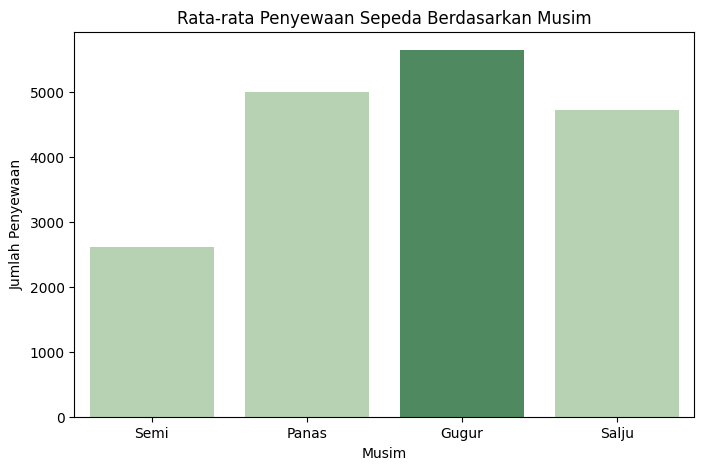

In [62]:
# Plot rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df['season'], y=day_df['cnt'], errorbar=None, estimator='mean', hue=day_df['season'], palette=["#B3D7AE", "#B3D7AE", "#44935B", "#B3D7AE"], legend=False)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1, 2, 3], ['Semi', 'Panas', 'Gugur', 'Salju'])
plt.show()

In [73]:
workingday_rental_df = day_df.groupby('workingday')['cnt'].sum().reset_index()
workingday_rental_df.rename(columns={'cnt': 'total_rental'}, inplace=True)
workingday_rental_df

,workingday,total_rental
0,0,1000269
1,1,2291787


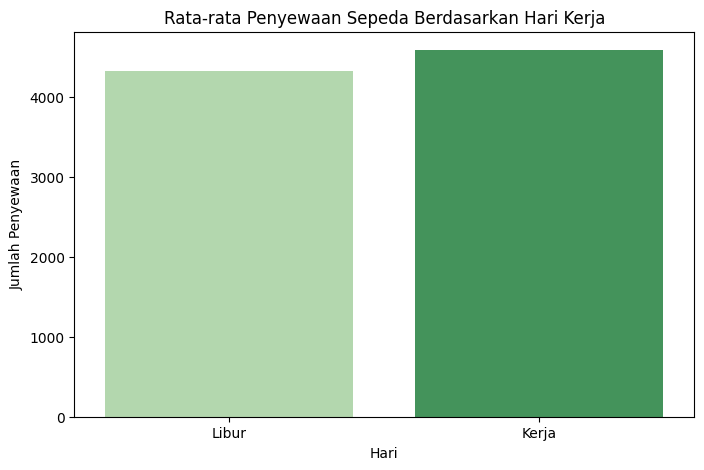

In [63]:
# Plot rata-rata penyewaan berdasarkan hari kerja
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df['workingday'], y=day_df['cnt'], errorbar=None, estimator='mean', hue=day_df['workingday'], palette='Greens', legend=False)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1], ['Libur', 'Kerja'])
plt.show()

### Pertanyaan 2: Apakah kondisi cuaca (`weathersit`) memiliki dampak signifikan terhadap jumlah penyewaan sepeda (`casual` dan `registered`)?


In [75]:
weather_rental_df = day_df.groupby('weathersit')['cnt'].sum().reset_index()
weather_rental_df.rename(columns={'cnt': 'total_rental'}, inplace=True)
weather_rental_df

,weathersit,total_rental
0,1,2257952
1,2,996858
2,3,37246


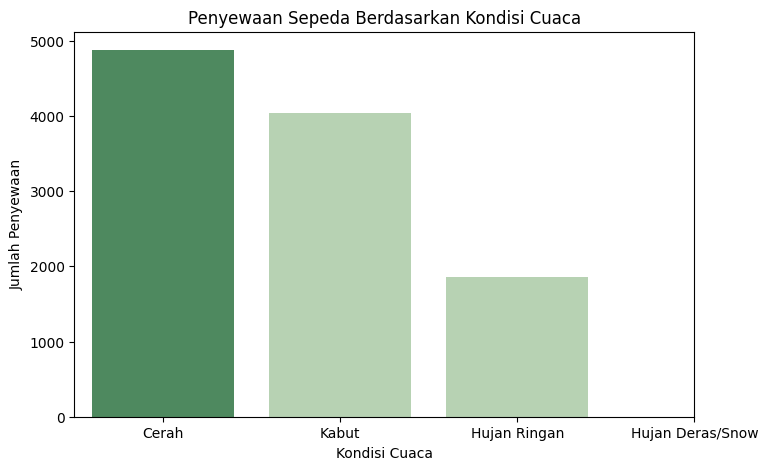

In [64]:
# Plot penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df['weathersit'], y=day_df['cnt'], errorbar=None, estimator='mean', hue=day_df['weathersit'], palette=["#44935B", "#B3D7AE", "#B3D7AE"], legend=False)
plt.title("Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1, 2, 3], ['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Deras/Snow'])
plt.show()

### Pertanyaan 3: Bagaimana tren jumlah penyewaan sepeda selama dua tahun terakhir (2011-2012)?

In [76]:
daily_trend_df = pd.DataFrame(day_df.set_index('dteday')['cnt'])
daily_trend_df.rename(columns={'cnt': 'total_rental'}, inplace=True)
daily_trend_df

,total_rental
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


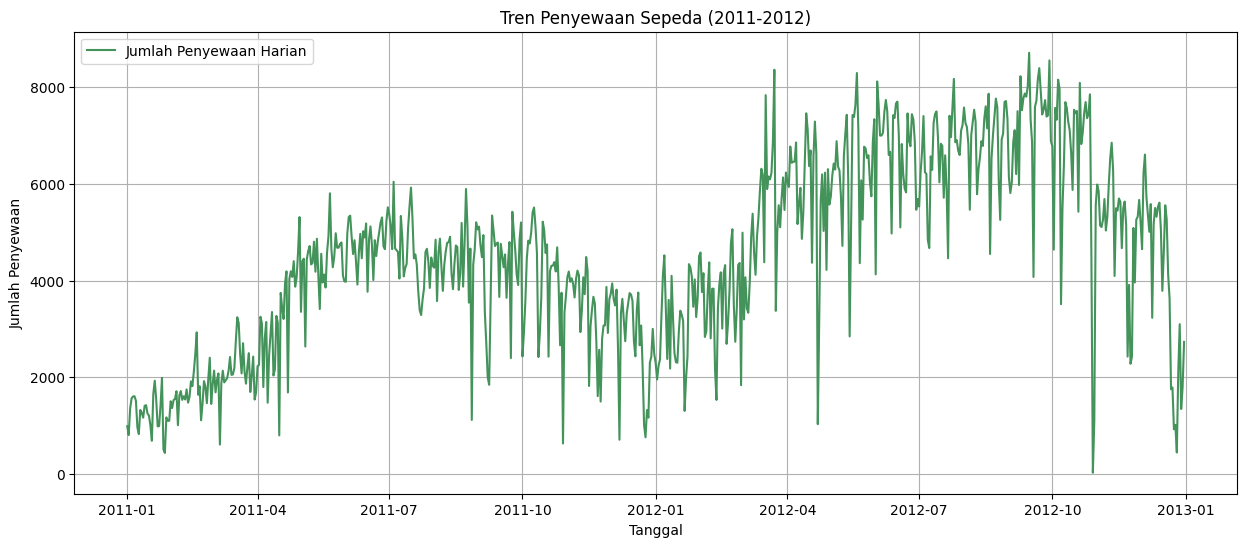

In [65]:
# Plot tren penyewaan sepeda harian
plt.figure(figsize=(15, 6))
plt.plot(day_df['dteday'], day_df['cnt'], color='#44935B', label='Jumlah Penyewaan Harian')
plt.title("Tren Penyewaan Sepeda (2011-2012)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 4: Apakah ada jam tertentu yang menunjukkan lonjakan penyewaan sepeda (data hourly)?

In [66]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
374,375,2011-01-17,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
9402,9403,2012-02-01,1,1,2,16,0,3,1,1,0.60,0.6212,0.40,0.2239,22,261,283
16759,16760,2012-12-06,4,1,12,2,0,4,1,1,0.24,0.2121,0.52,0.2836,0,9,9
14634,14635,2012-09-06,3,1,9,23,0,4,1,1,0.64,0.5758,0.89,0.1642,19,150,169
8379,8380,2011-12-20,4,0,12,19,0,2,1,1,0.38,0.3939,0.66,0.0000,6,218,224


In [67]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [79]:
hourly_rental_df = hour_df.groupby('hr')['cnt'].sum().reset_index()
hourly_rental_df.rename(columns={'cnt': 'total_rental'}, inplace=True)
hourly_rental_df

,hr,total_rental
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


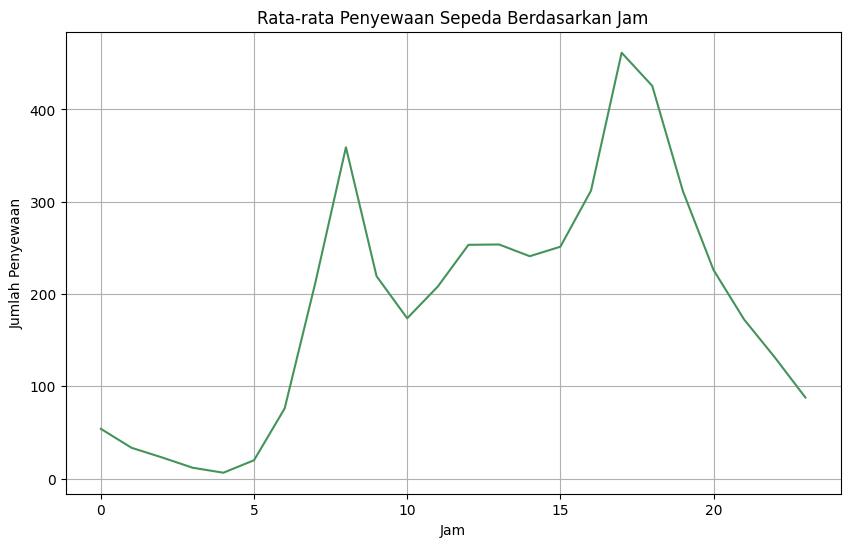

In [68]:
# Plot rata-rata penyewaan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], estimator='mean', errorbar=None, color='#44935B')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.grid()
plt.show()

**Insight:**
- Berhasil menjawab soal-soalnya dan mendapatkan plot dari masing-masing soal

## Analisis Lanjutan (Opsional)

### Clustering

In [69]:
# Menambahkan kolom baru 'time_of_day' berdasarkan jam
def label_time_of_day(hour):
    if 5 <= hour <= 10:
        return 'Pagi'
    elif 11 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 20:
        return 'Sore'
    else:
        return 'Malam'

hour_df['time_of_day'] = hour_df['hr'].apply(label_time_of_day)

In [70]:
# Melihat distribusi data berdasarkan time_of_day
hour_df.groupby('time_of_day')['cnt'].mean()

,cnt
time_of_day,
Malam,65.687968
Pagi,177.071264
Siang,241.475563
Sore,347.343304


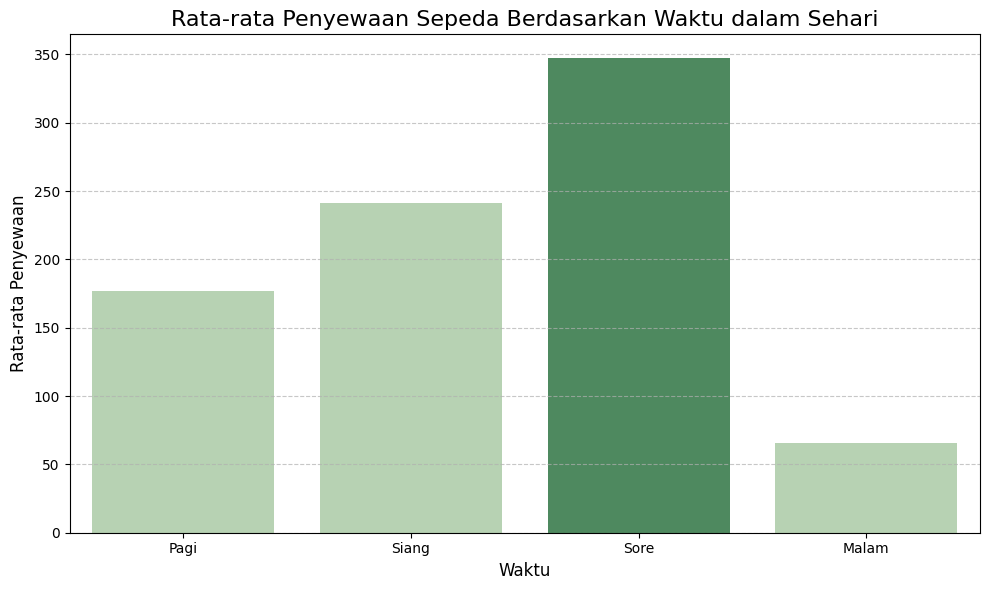

In [71]:
# Menghitung rata-rata penyewaan sepeda berdasarkan time_of_day
time_of_day_avg = hour_df.groupby('time_of_day')['cnt'].mean().reset_index()

# Mengatur urutan kategori time_of_day
order = ['Pagi', 'Siang', 'Sore', 'Malam']

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_avg, x='time_of_day', y='cnt', order=order, hue='time_of_day', palette=["#B3D7AE", "#B3D7AE", "#B3D7AE", "#44935B"], legend=False)

# Menambahkan judul dan label
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dapat diketahui bahwa berdasarkan musim (`season`), musim gugur memiliki rerataan paling tinggi dibandingkan dengan musim-musim lainnya. Sedangkan berdasarkan hari kerja (`workingday`), hari ketika orang-orang kerja memiliki rerataan yang lebih tinggi daripada hari libur.
- Conclution pertanyaan 2: Ternyata kondisi cuaca (`weathersit`) memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda (`casual` dan `registered`), terlihat pada grafik bahwa cuaca cerah dan berkabut jauh lebih banyak penyewaannya ketimbang cuaca hujan ataupun salju.
- Conclution pertanyaan 3: Selama dua tahun terakhir (2011-2012) trennya cukup fluktuatif, terlihat bahwa grafik naik turun perbulannya dan mencapai puncaknya pada bulan April-Oktober di tahun 2012.
-  Conclution pertanyaan 4: Terdapat lonjakan pada jam tertentu yaitu sekitar jam 5-8 dan sekitar jam 15-17. Selain itu terdapat kemerosotan pada jam 8-10 juga jam 17-24.
- Setelah melakukan analisis lanjutan menggunakan teknik Clustering dapat diketahui bahwa waktu Sore adalah waktu dimana penyewaan sepeda paling banyak dilakukan

## Simpan Berkas Data

In [78]:
day_df.to_csv("day_data_clean.csv", index=False)
hour_df.to_csv("hour_data_clean.csv", index=False)